# 佐賀市の最高気温ページを分析

In [1]:
import numpy
import pandas
import matplotlib.pyplot as plt
import japanize_matplotlib
import re

In [2]:
url = 'http://www.data.jma.go.jp/obd/stats/etrn/view/monthly_s3.php?prec_no=85&block_no=47813&year=&month=&day=&elm=monthly&view=a2'

In [3]:
pat = re.compile(r'([-]*\d+\.\d*)\D*')
def cleanSeries(serIn:pandas.Series) -> pandas.Series:
    """
    列データに含まれる、数値以外の文字を除く
    """
    ser = serIn.copy()
    for k in ser.index:
        v = ser[k]
        if type(v) is str:
            m = pat.match(v)
            if m:
                v = m.group(1)
        ser[k]=numpy.float64(v)
    return ser

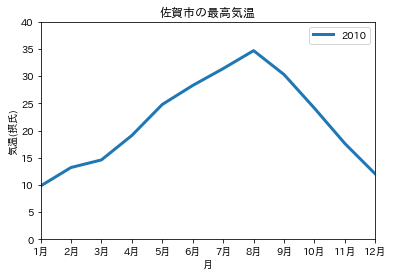

In [4]:
dataFrames = pandas.read_html(url)
df = dataFrames[0].drop('年の値', axis = 'columns')
df.set_index('年', inplace = True)

fig, ax = plt.subplots(facecolor = 'w')
ax.set_title('佐賀市の最高気温')
ax.set_xlim(0, 11)
ax.set_ylim(0, 40)
ax.set_xlabel('月')
ax.set_ylabel('気温(摂氏)')
ax.set_xticks([x for x in range(12)])

year = 2010
ser = df.loc[year]
ser = cleanSeries(ser)
ser.plot(ax = ax, label = str(year), linewidth = 3)

ax.legend(loc = 'best')
plt.savefig('SagaTemperature.pdf')
plt.show()